In [1]:
%matplotlib inline
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

from transcode import create_circuit, measure_cg, decode_cg, decode_au, measure_au

In [2]:
sim = AerSimulator()

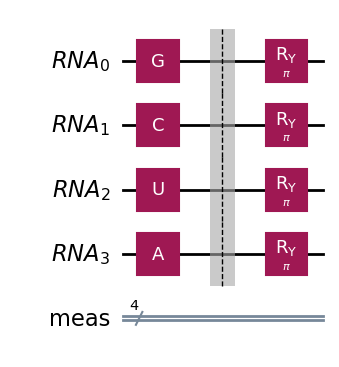

In [9]:
qc, qreg, meas  = create_circuit('AUCG')
qc.draw('mpl')

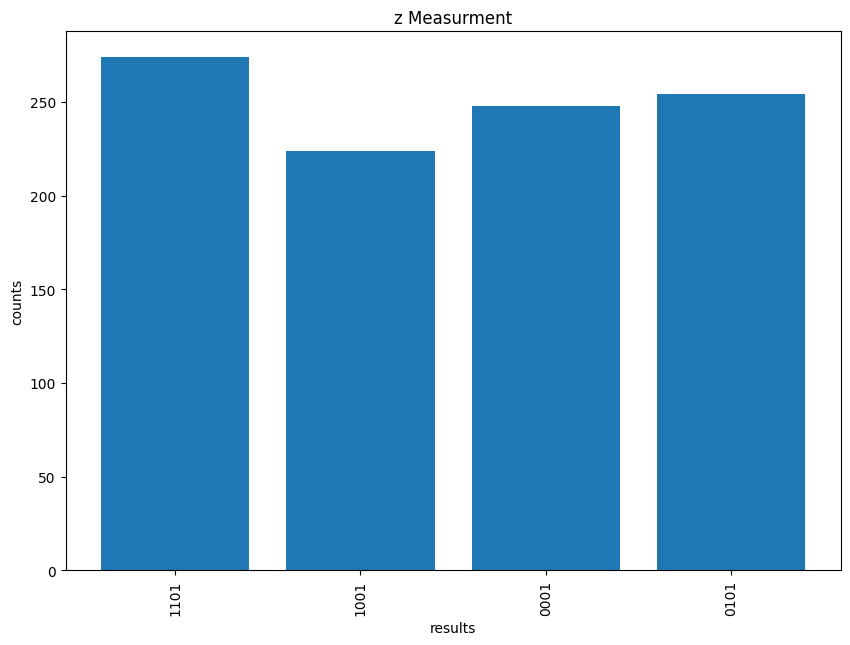

In [10]:
dec_qc = measure_cg(qc, qreg, meas).decompose()
counts_cg = sim.run(dec_qc, shots=1000).result().get_counts()

plt.figure(figsize=(10,7))
plt.bar(x=list(counts_cg.keys()), height=list(counts_cg.values()))
plt.xticks(rotation=90)
plt.ylabel("counts")
plt.xlabel("results")
plt.title("z Measurment")
plt.show()

In [11]:
DNA = decode_cg(counts_cg)
DNA

'xxGC'

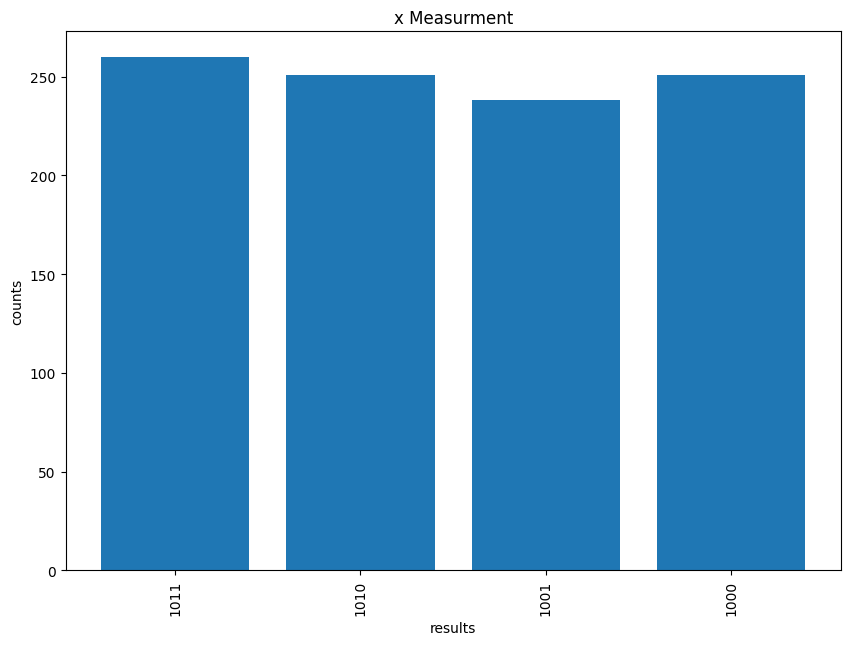

In [12]:
dec_qc = measure_au(qc, qreg, meas).decompose()
counts_au = sim.run(dec_qc, shots=1000).result().get_counts()

plt.figure(figsize=(10,7))
plt.bar(x=list(counts_au.keys()), height=list(counts_au.values()))
plt.xticks(rotation=90)
plt.ylabel("counts")
plt.xlabel("results")
plt.title("x Measurment")
plt.show()

In [13]:
decode_au(counts_au, DNA)

'TAGC'